# Visulalisation

In [38]:
import pandas as pd
import seaborn as sns

In [39]:
# Load DataFrame
import pickle
path = './data/df_results_l2_1.pickle'
with open(path, 'rb') as f:
    df_results = pickle.load(f)

In [40]:
df_results.index = df_results.index.rename('loss_name', level=4)

In [41]:
df_results = (df_results.reset_index()
                        .dropna())

## Desired format :

In [42]:
df_results.epsilon.unique()

array([ 2.17355395,  4.34710791,  6.52066186,  8.69421582, 10.86776977,
       13.04132373, 15.21487768, 17.38843164, 19.56198559])

In [43]:
# Sanity check
(df_results.epsilon < df_results.eta).sum()
df_results[df_results.epsilon == 0].sum()

method       0.0
eta          0.0
epsilon      0.0
n_steps      0.0
loss_name    0.0
loss         0.0
accuracy     0.0
dtype: float64

In [44]:
df_results.method.unique()

array(['pgd_l2', 'pgd_l2_random'], dtype=object)

In [45]:
df_results[df_results.method.str.contains('pgd_l2')]

,method,eta,epsilon,n_steps,loss_name,loss,accuracy
0,pgd_l2,0.003922,2.173554,2,mean_squared_error,3.200265,0.3333
1,pgd_l2,0.003922,2.173554,2,categorical_crossentropy,3.383821,0.3347
2,pgd_l2,0.003922,2.173554,4,mean_squared_error,6.161351,0.1260
3,pgd_l2,0.003922,2.173554,4,categorical_crossentropy,6.692660,0.1261
4,pgd_l2,0.003922,2.173554,6,mean_squared_error,9.237444,0.0437
...,...,...,...,...,...,...,...
1939,pgd_l2_random,0.035294,19.561986,8,categorical_crossentropy,21.892988,0.0206
1940,pgd_l2_random,0.035294,19.561986,10,mean_squared_error,48.100182,0.0000
1941,pgd_l2_random,0.035294,19.561986,10,categorical_crossentropy,21.891304,0.0205
1942,pgd_l2_random,0.035294,19.561986,1,mean_squared_error,8.807061,0.0476


In [46]:
df_results.method.unique()

array(['pgd_l2', 'pgd_l2_random'], dtype=object)

In [47]:
# Rename PGD n_step == 1 to FGSM
# These are FGSM since FGSM is PGD with n_step =1
mask_fgsm = df_results.n_steps == 1
df_results.loc[mask_fgsm, 'method', ] = (df_results.loc[mask_fgsm, 'method']
                                                       .str
                                                       .replace('pgd', 'fgsm'))

In [48]:
df_results.epsilon

0        2.173554
1        2.173554
2        2.173554
3        2.173554
4        2.173554
          ...    
1939    19.561986
1940    19.561986
1941    19.561986
1942    19.561986
1943    19.561986
Name: epsilon, Length: 1944, dtype: float64

In [49]:
df_results[df_results.method == 'pgd_l2_random'].sort_values('accuracy')

,method,eta,epsilon,n_steps,loss_name,loss,accuracy
1456,pgd_l2_random,0.019608,10.867770,6,mean_squared_error,25.997389,0.0000
1700,pgd_l2_random,0.027451,15.214878,10,mean_squared_error,42.158894,0.0000
1698,pgd_l2_random,0.027451,15.214878,8,mean_squared_error,36.288486,0.0000
1696,pgd_l2_random,0.027451,15.214878,6,mean_squared_error,30.220913,0.0000
1278,pgd_l2_random,0.011765,17.388432,8,mean_squared_error,24.111139,0.0000
...,...,...,...,...,...,...,...
985,pgd_l2_random,0.003922,4.347108,2,categorical_crossentropy,3.383442,0.3350
1069,pgd_l2_random,0.003922,19.561986,2,categorical_crossentropy,3.384919,0.3351
1057,pgd_l2_random,0.003922,17.388432,2,categorical_crossentropy,3.385149,0.3351
973,pgd_l2_random,0.003922,2.173554,2,categorical_crossentropy,3.384213,0.3351


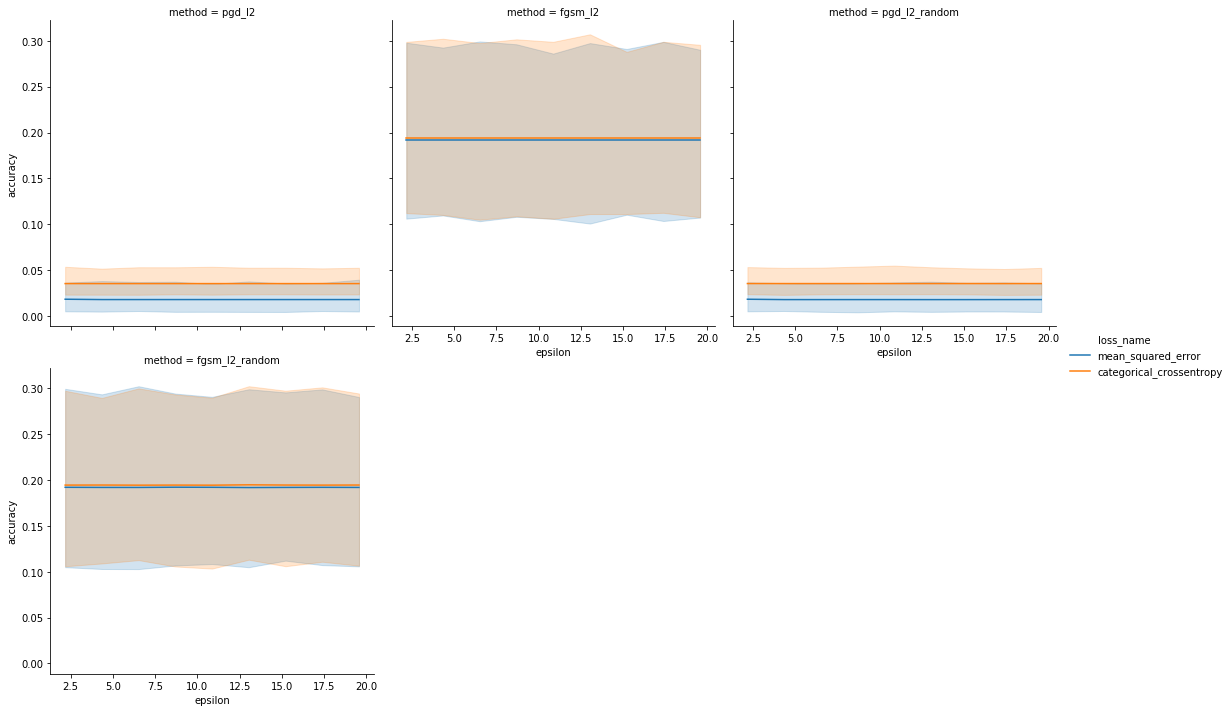

In [50]:
g = sns.relplot(x="epsilon", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.reset_index())

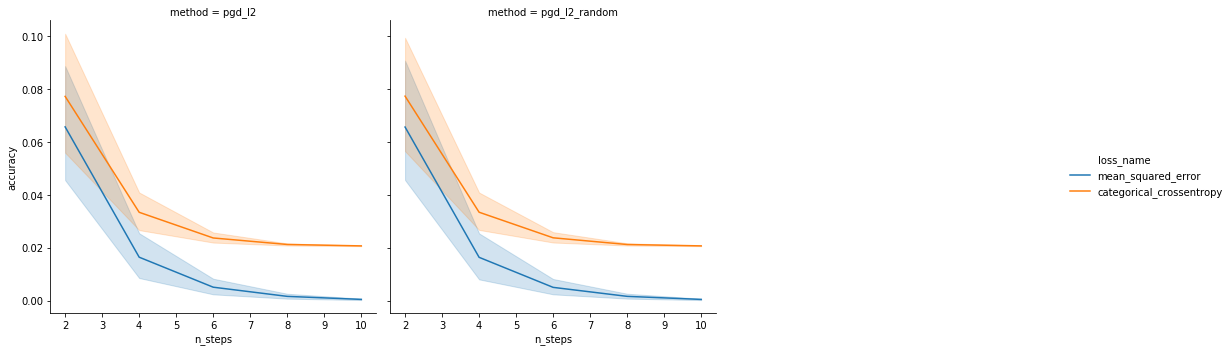

In [57]:
g = sns.relplot(x="n_steps", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.loc[~mask_fgsm])

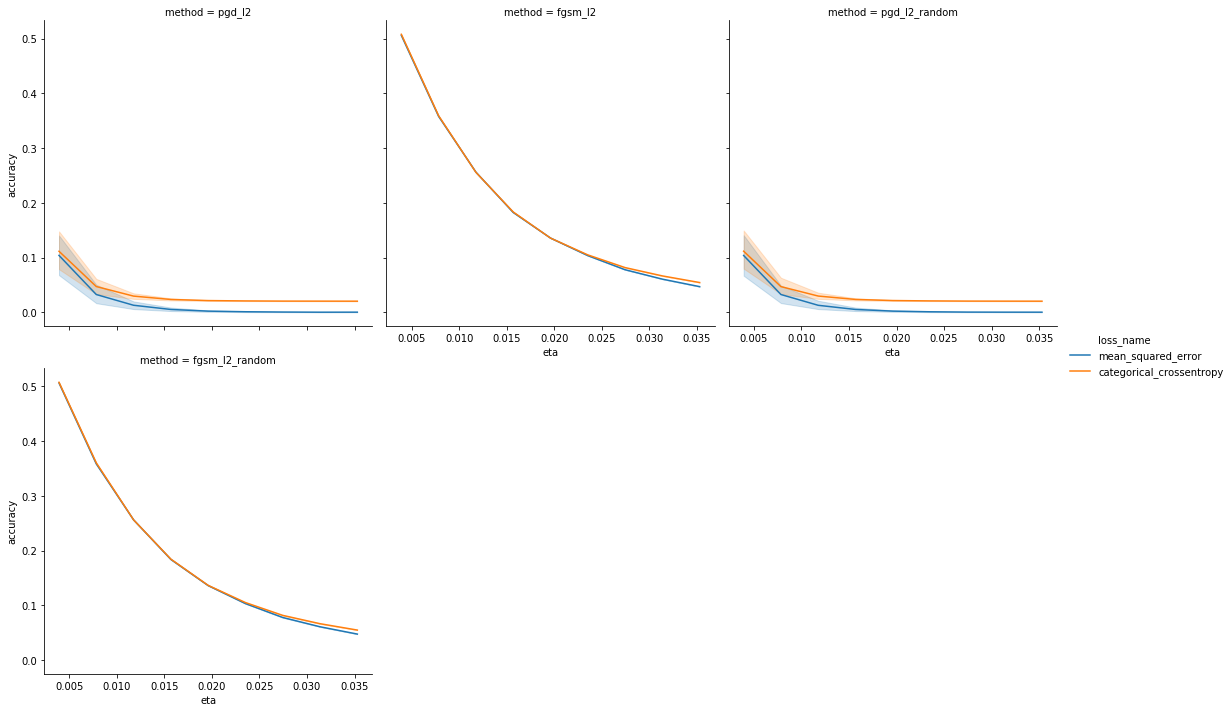

In [55]:
g = sns.relplot(x="eta", y="accuracy",
                 col="method", col_wrap=3, hue='loss_name',
                 kind="line", data=df_results)